# core

> Fill in a module description here

In [ ]:
#| default_exp core

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
def foo(): pass

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()

In [ ]:
%load_ext autoreload
%autoreload 1
%config InlineBackend.figure_format = 'retina'

import datetime
import hashlib
import json
import os
import re
import sys
import time
import warnings

import ipywidgets as widgets
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from matplotlib.ticker import FuncFormatter
from pandas.plotting import register_matplotlib_converters
from scipy.stats import norm

register_matplotlib_converters()
import seaborn as sns
from IPython.display import Markdown, display

sns.set()
sns.set_context("poster", font_scale=1.3)
plt.rcParams["figure.figsize"] = 10, 6
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.precision = 4
warnings.simplefilter(action="ignore", category=FutureWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import io

In [ ]:
raw = pd.read_csv(io.StringIO("""country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
Afghanistan,0,0,0,0.0
Albania,89,132,54,4.9
Algeria,25,0,14,0.7
Andorra,245,138,312,12.4
Angola,217,57,45,5.9
Antigua & Barbuda,102,128,45,4.9
Argentina,193,25,221,8.3
Armenia,21,179,11,3.8
Australia,261,72,212,10.4
Austria,279,75,191,9.7
Azerbaijan,21,46,5,1.3
Bahamas,122,176,51,6.3
Bahrain,42,63,7,2.0
Bangladesh,0,0,0,0.0
Barbados,143,173,36,6.3
Belarus,142,373,42,14.4
Belgium,295,84,212,10.5
Belize,263,114,8,6.8
Benin,34,4,13,1.1
Bhutan,23,0,0,0.4
Bolivia,167,41,8,3.8
Bosnia-Herzegovina,76,173,8,4.6
Botswana,173,35,35,5.4
Brazil,245,145,16,7.2
Brunei,31,2,1,0.6
Bulgaria,231,252,94,10.3
Burkina Faso,25,7,7,4.3
Burundi,88,0,0,6.3
Cote d'Ivoire,37,1,7,4.0
Cabo Verde,144,56,16,4.0
Cambodia,57,65,1,2.2
Cameroon,147,1,4,5.8
Canada,240,122,100,8.2
Central African Republic,17,2,1,1.8
Chad,15,1,1,0.4
Chile,130,124,172,7.6
China,79,192,8,5.0
Colombia,159,76,3,4.2
Comoros,1,3,1,0.1
Congo,76,1,9,1.7
Cook Islands,0,254,74,5.9
Costa Rica,149,87,11,4.4
Croatia,230,87,254,10.2
Cuba,93,137,5,4.2
Cyprus,192,154,113,8.2
Czech Republic,361,170,134,11.8
North Korea,0,0,0,0.0
DR Congo,32,3,1,2.3
Denmark,224,81,278,10.4
Djibouti,15,44,3,1.1
Dominica,52,286,26,6.6
Dominican Republic,193,147,9,6.2
Ecuador,162,74,3,4.2
Egypt,6,4,1,0.2
El Salvador,52,69,2,2.2
Equatorial Guinea,92,0,233,5.8
Eritrea,18,0,0,0.5
Estonia,224,194,59,9.5
Ethiopia,20,3,0,0.7
Fiji,77,35,1,2.0
Finland,263,133,97,10.0
France,127,151,370,11.8
Gabon,347,98,59,8.9
Gambia,8,0,1,2.4
Georgia,52,100,149,5.4
Germany,346,117,175,11.3
Ghana,31,3,10,1.8
Greece,133,112,218,8.3
Grenada,199,438,28,11.9
Guatemala,53,69,2,2.2
Guinea,9,0,2,0.2
Guinea-Bissau,28,31,21,2.5
Guyana,93,302,1,7.1
Haiti,1,326,1,5.9
Honduras,69,98,2,3.0
Hungary,234,215,185,11.3
Iceland,233,61,78,6.6
India,9,114,0,2.2
Indonesia,5,1,0,0.1
Iran,0,0,0,0.0
Iraq,9,3,0,0.2
Ireland,313,118,165,11.4
Israel,63,69,9,2.5
Italy,85,42,237,6.5
Jamaica,82,97,9,3.4
Japan,77,202,16,7.0
Jordan,6,21,1,0.5
Kazakhstan,124,246,12,6.8
Kenya,58,22,2,1.8
Kiribati,21,34,1,1.0
Kuwait,0,0,0,0.0
Kyrgyzstan,31,97,6,2.4
Laos,62,0,123,6.2
Latvia,281,216,62,10.5
Lebanon,20,55,31,1.9
Lesotho,82,29,0,2.8
Liberia,19,152,2,3.1
Libya,0,0,0,0.0
Lithuania,343,244,56,12.9
Luxembourg,236,133,271,11.4
Madagascar,26,15,4,0.8
Malawi,8,11,1,1.5
Malaysia,13,4,0,0.3
Maldives,0,0,0,0.0
Mali,5,1,1,0.6
Malta,149,100,120,6.6
Marshall Islands,0,0,0,0.0
Mauritania,0,0,0,0.0
Mauritius,98,31,18,2.6
Mexico,238,68,5,5.5
Micronesia,62,50,18,2.3
Monaco,0,0,0,0.0
Mongolia,77,189,8,4.9
Montenegro,31,114,128,4.9
Morocco,12,6,10,0.5
Mozambique,47,18,5,1.3
Myanmar,5,1,0,0.1
Namibia,376,3,1,6.8
Nauru,49,0,8,1.0
Nepal,5,6,0,0.2
Netherlands,251,88,190,9.4
New Zealand,203,79,175,9.3
Nicaragua,78,118,1,3.5
Niger,3,2,1,0.1
Nigeria,42,5,2,9.1
Niue,188,200,7,7.0
Norway,169,71,129,6.7
Oman,22,16,1,0.7
Pakistan,0,0,0,0.0
Palau,306,63,23,6.9
Panama,285,104,18,7.2
Papua New Guinea,44,39,1,1.5
Paraguay,213,117,74,7.3
Peru,163,160,21,6.1
Philippines,71,186,1,4.6
Poland,343,215,56,10.9
Portugal,194,67,339,11.0
Qatar,1,42,7,0.9
South Korea,140,16,9,9.8
Moldova,109,226,18,6.3
Romania,297,122,167,10.4
Russian Federation,247,326,73,11.5
Rwanda,43,2,0,6.8
St. Kitts & Nevis,194,205,32,7.7
St. Lucia,171,315,71,10.1
St. Vincent & the Grenadines,120,221,11,6.3
Samoa,105,18,24,2.6
San Marino,0,0,0,0.0
Sao Tome & Principe,56,38,140,4.2
Saudi Arabia,0,5,0,0.1
Senegal,9,1,7,0.3
Serbia,283,131,127,9.6
Seychelles,157,25,51,4.1
Sierra Leone,25,3,2,6.7
Singapore,60,12,11,1.5
Slovakia,196,293,116,11.4
Slovenia,270,51,276,10.6
Solomon Islands,56,11,1,1.2
Somalia,0,0,0,0.0
South Africa,225,76,81,8.2
Spain,284,157,112,10.0
Sri Lanka,16,104,0,2.2
Sudan,8,13,0,1.7
Suriname,128,178,7,5.6
Swaziland,90,2,2,4.7
Sweden,152,60,186,7.2
Switzerland,185,100,280,10.2
Syria,5,35,16,1.0
Tajikistan,2,15,0,0.3
Thailand,99,258,1,6.4
Macedonia,106,27,86,3.9
Timor-Leste,1,1,4,0.1
Togo,36,2,19,1.3
Tonga,36,21,5,1.1
Trinidad & Tobago,197,156,7,6.4
Tunisia,51,3,20,1.3
Turkey,51,22,7,1.4
Turkmenistan,19,71,32,2.2
Tuvalu,6,41,9,1.0
Uganda,45,9,0,8.3
Ukraine,206,237,45,8.9
United Arab Emirates,16,135,5,2.8
United Kingdom,219,126,195,10.4
Tanzania,36,6,1,5.7
USA,249,158,84,8.7
Uruguay,115,35,220,6.6
Uzbekistan,25,101,8,2.4
Vanuatu,21,18,11,0.9
Venezuela,333,100,3,7.7
Vietnam,111,2,1,2.0
Yemen,6,0,0,0.1
Zambia,32,19,4,2.5
Zimbabwe,64,18,4,4.7
"""))

In [ ]:
raw.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [ ]:
raw.shape

(193, 5)

In [ ]:
raw.tail(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
183,Tanzania,36,6,1,5.7
184,USA,249,158,84,8.7
185,Uruguay,115,35,220,6.6
186,Uzbekistan,25,101,8,2.4
187,Vanuatu,21,18,11,0.9
188,Venezuela,333,100,3,7.7
189,Vietnam,111,2,1,2.0
190,Yemen,6,0,0,0.1
191,Zambia,32,19,4,2.5
192,Zimbabwe,64,18,4,4.7


In [ ]:
raw.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'],
      dtype='object')

In [ ]:
def raw_to_cleaned(raw):
    return (raw.copy())

df = raw_to_cleaned(raw)

Questions
- alcohol per drink type (external dataset?)
- servings 
- most alcohol vs least?


Visualizations
- distributions of each 
- correlation of each type to the other
- Map w/ darkness of country corresponds to total liters of pure alcohol
- Ratio of beer to wine to spirits (map)


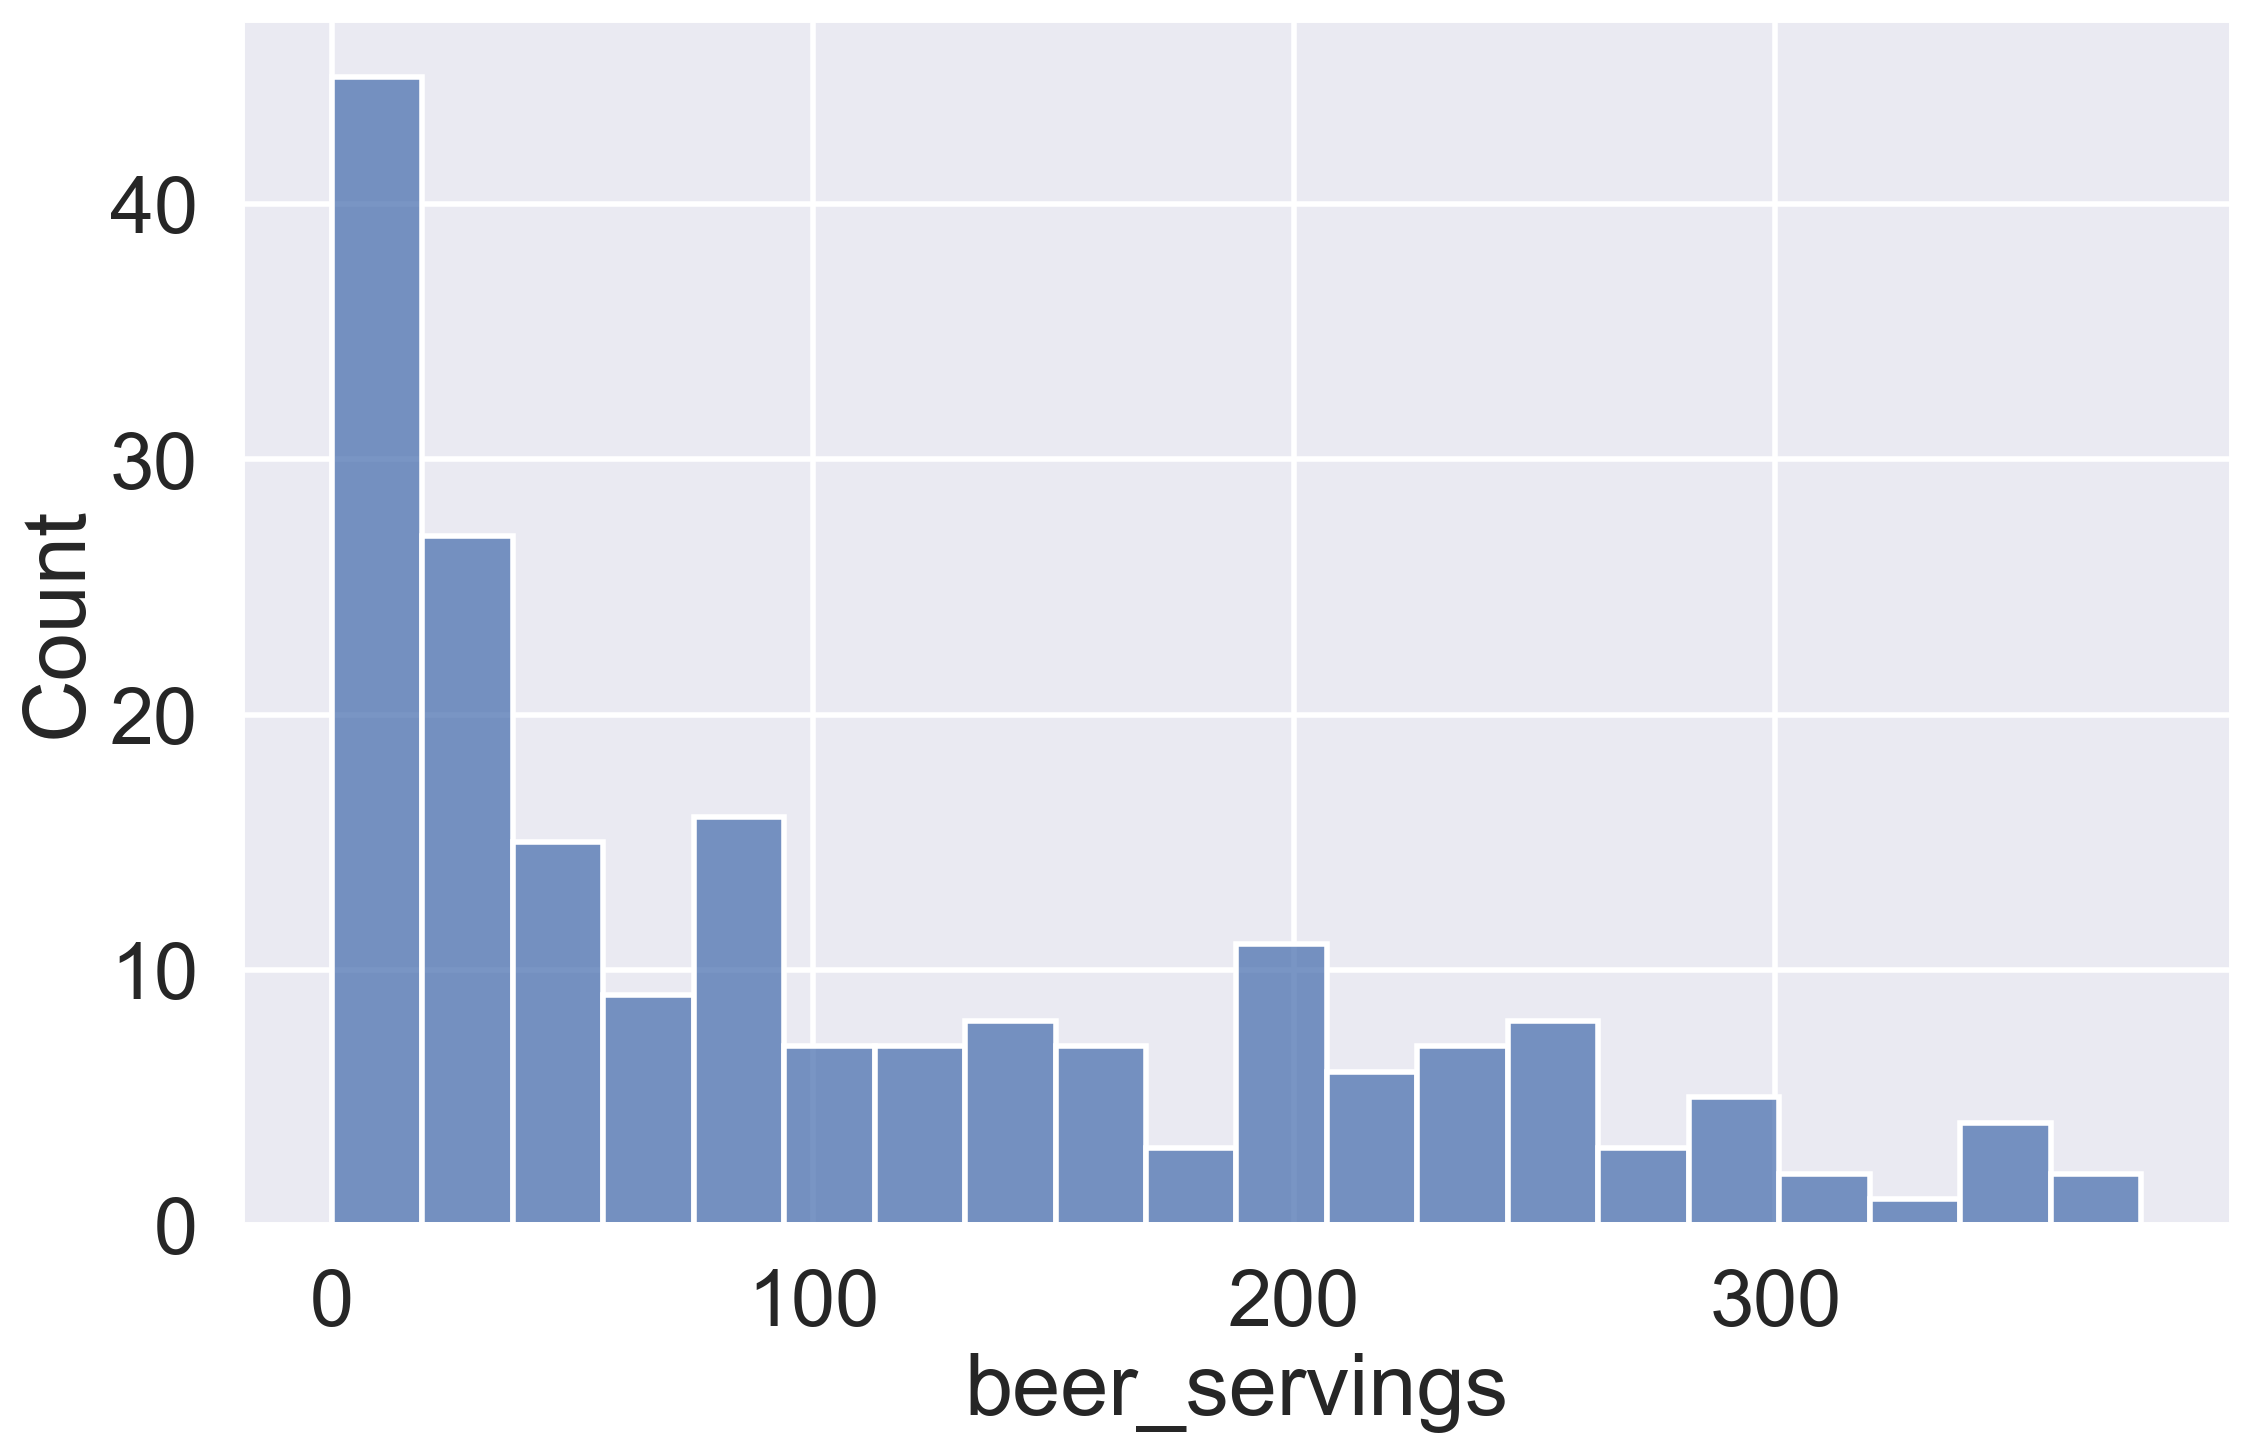

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('w')
sns.histplot(df['beer_servings'],ax=ax, bins=20)
fig.tight_layout()

In [ ]:
def plot_by_type(col='beer_servings', bins=20):
    fig, ax = plt.subplots(figsize=(12, 8))
    fig.patch.set_facecolor('w')
    sns.histplot(df[col],ax=ax, bins=bins)
    fig.tight_layout()

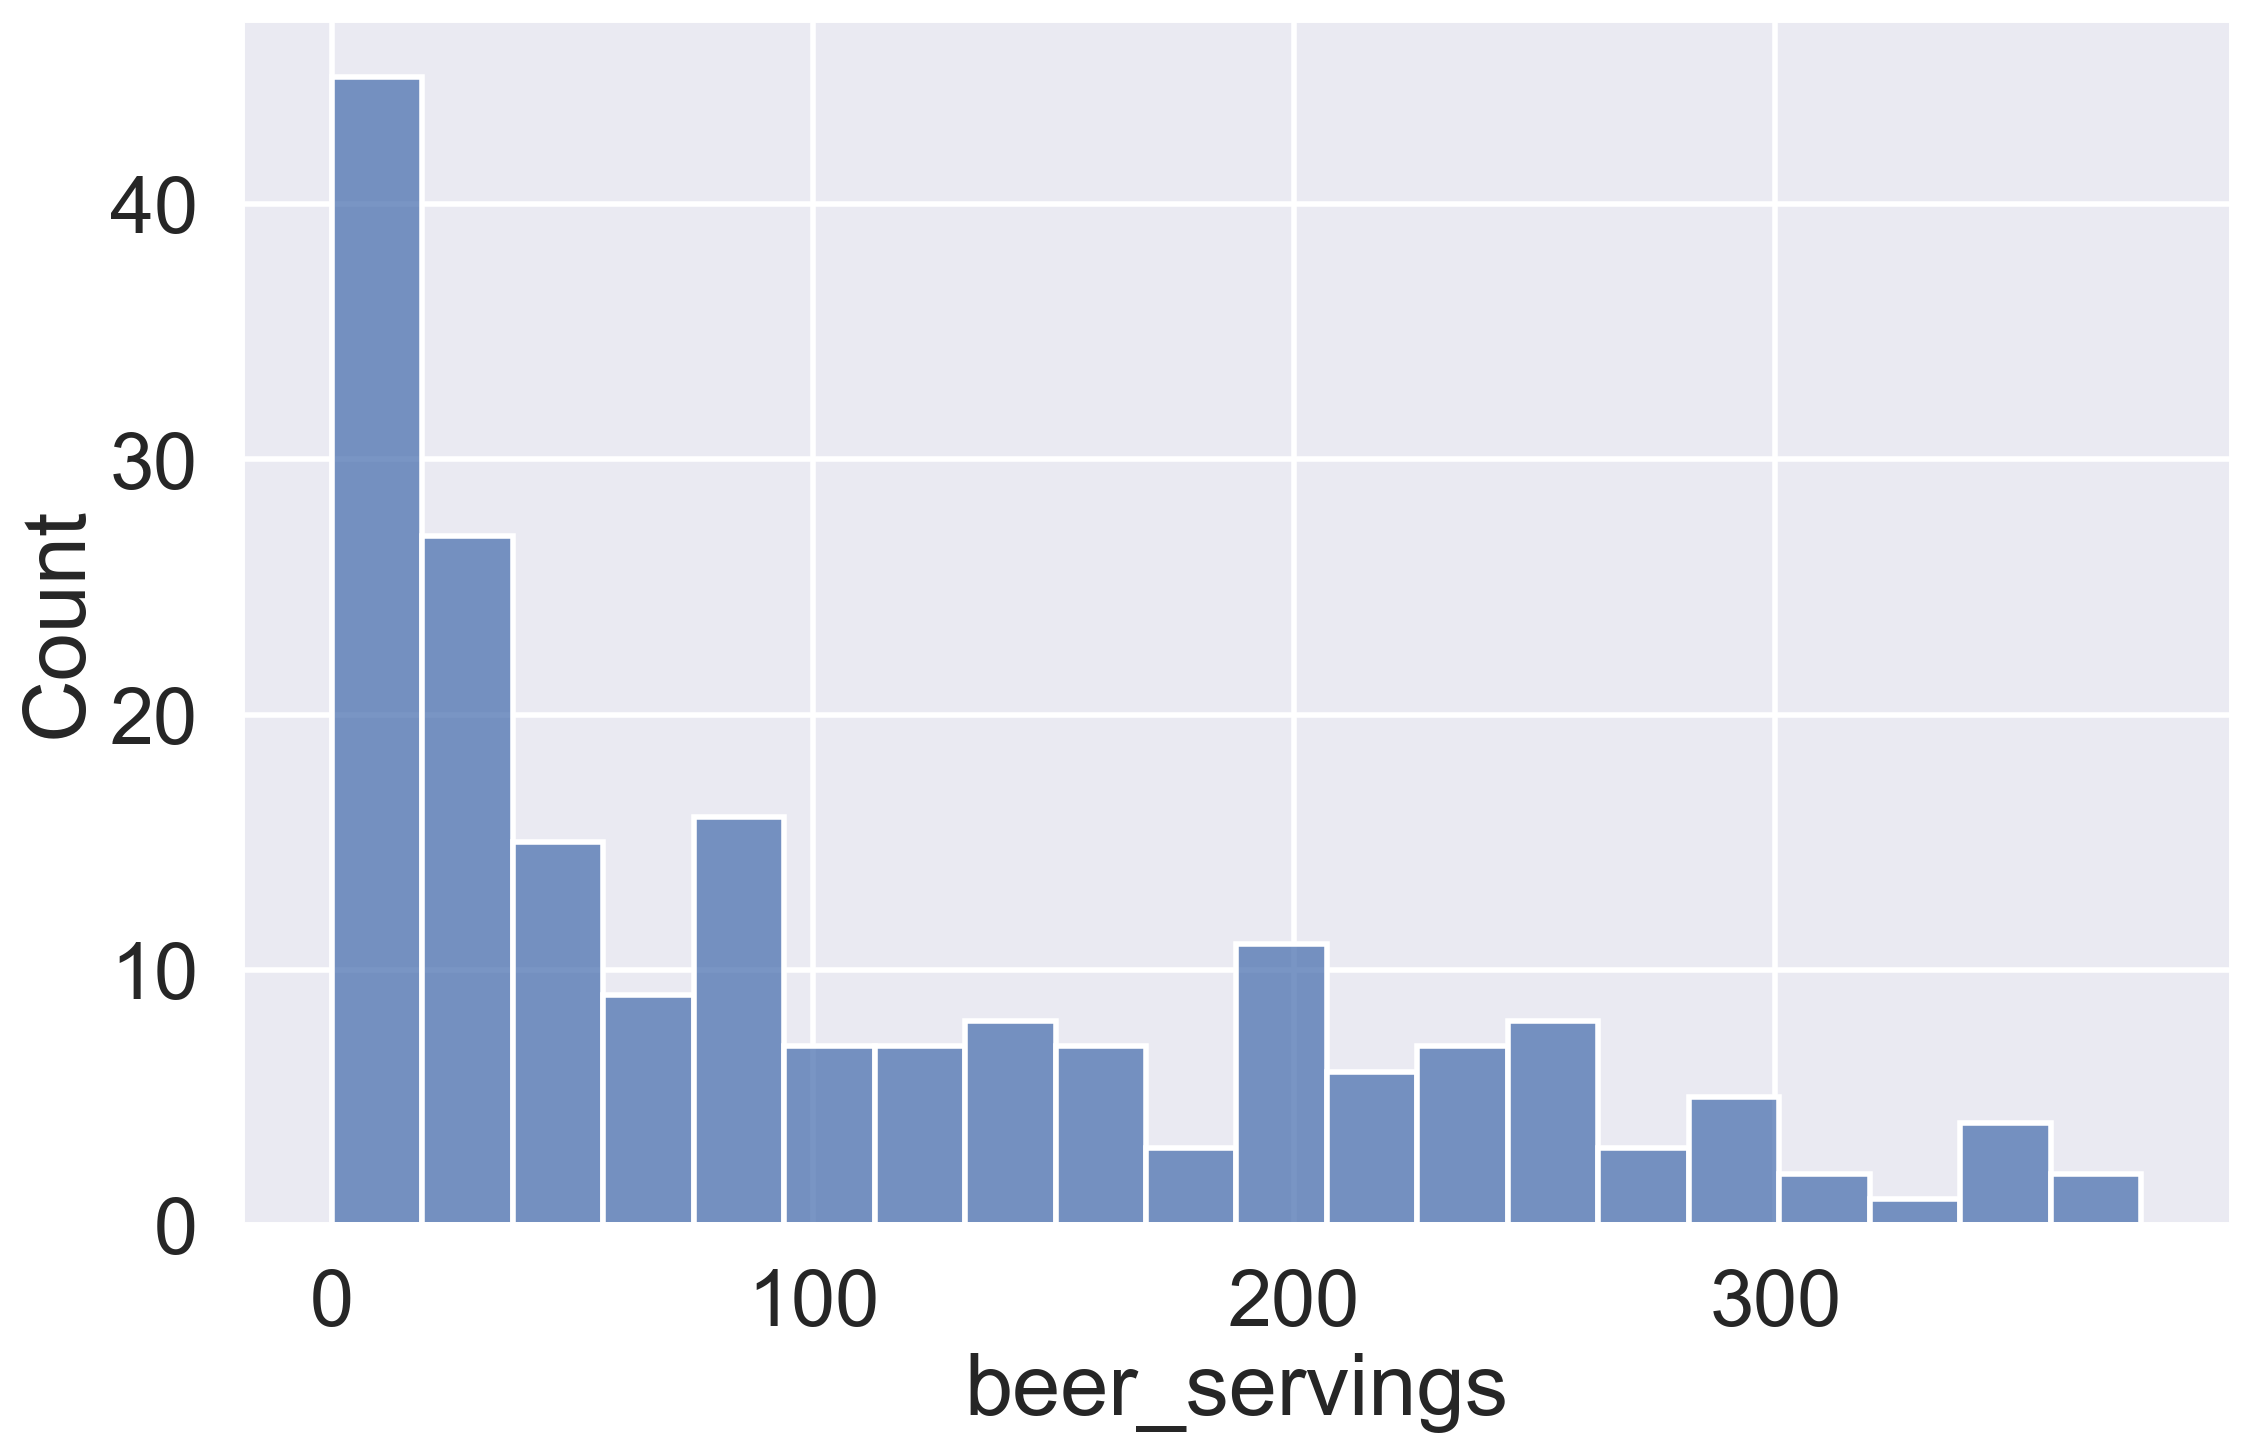

In [ ]:
plot_by_type()

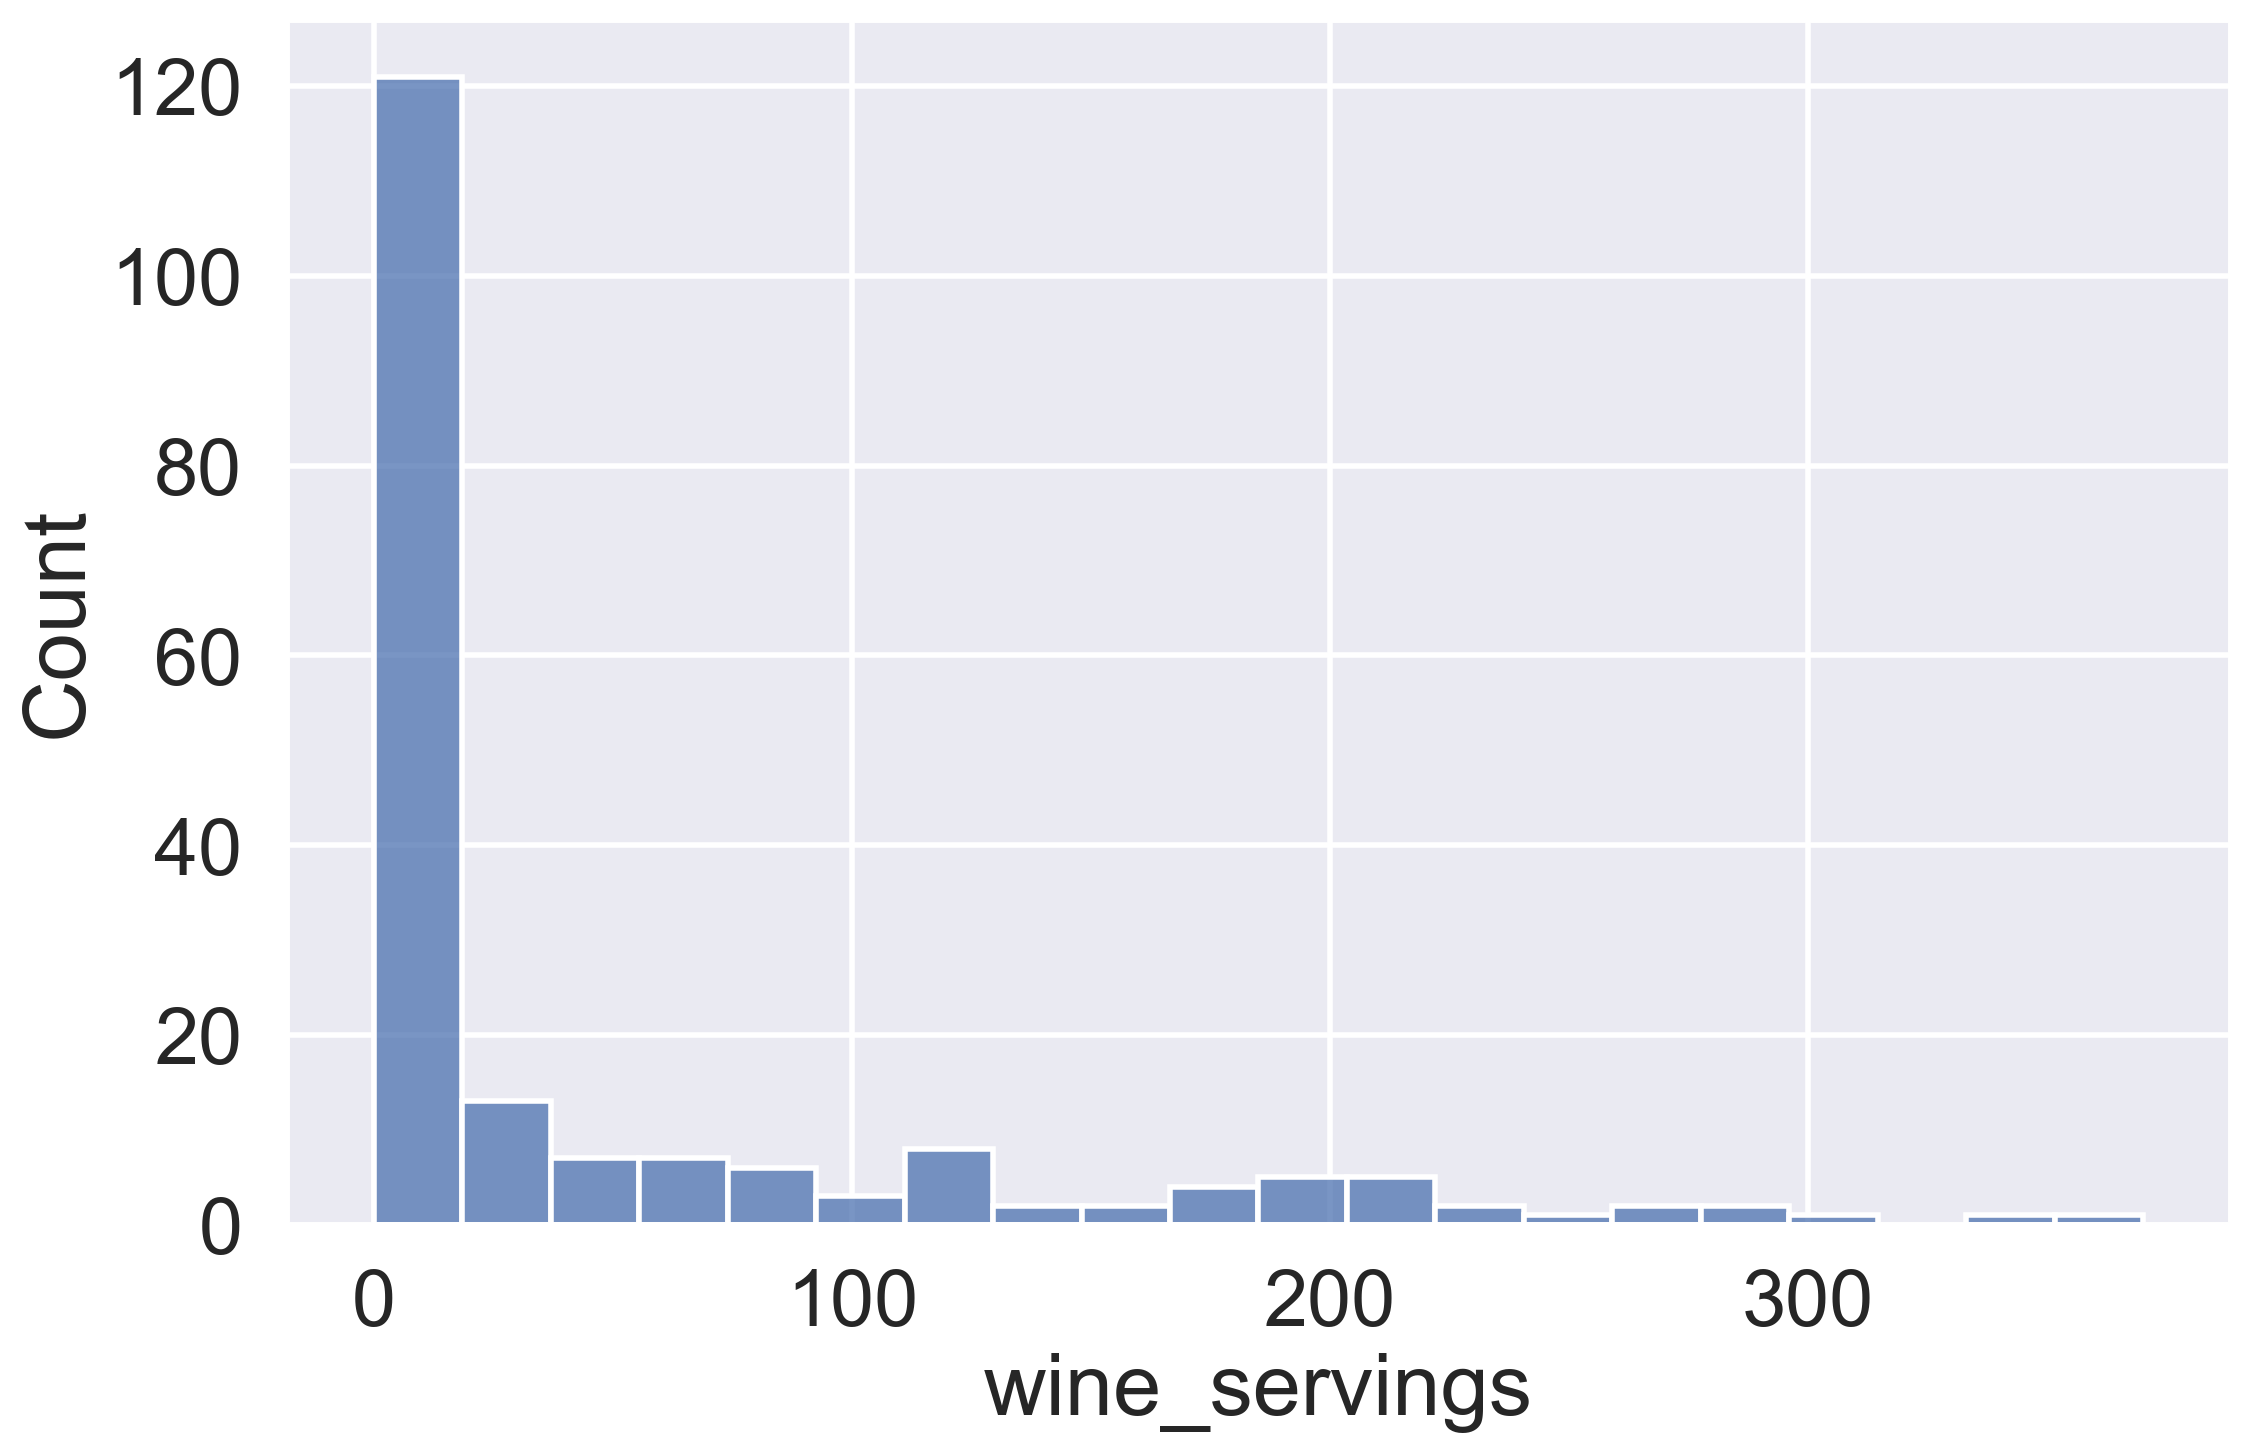

In [ ]:
plot_by_type(col='wine_servings')

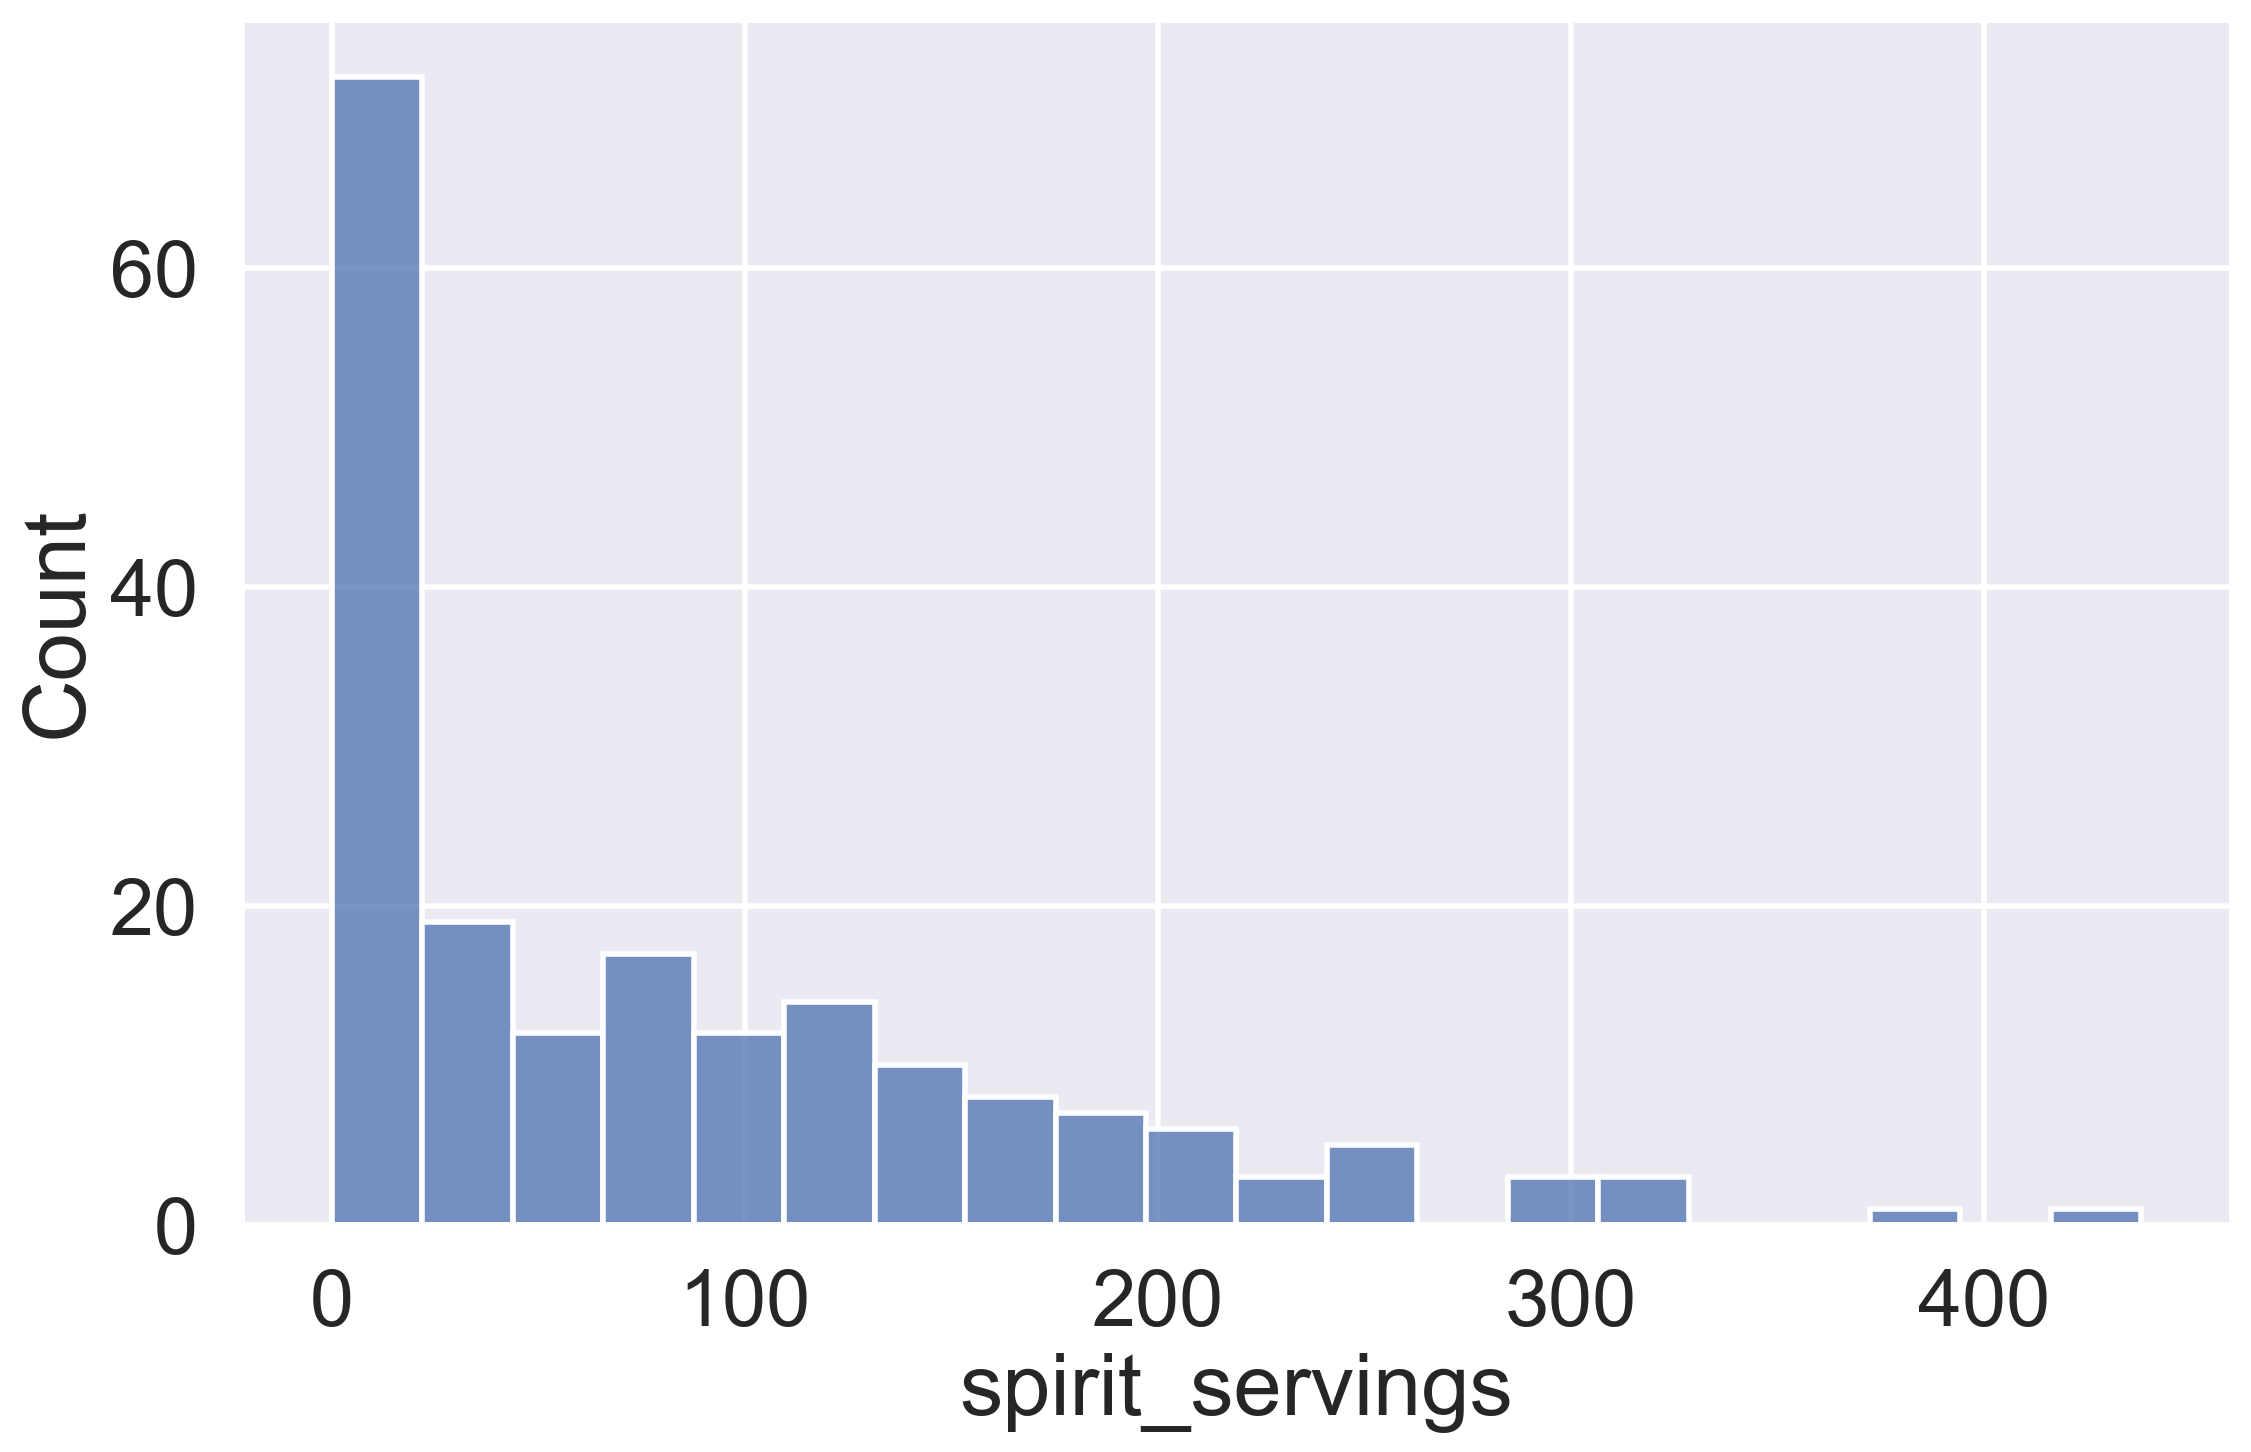

In [ ]:
plot_by_type(col='spirit_servings')

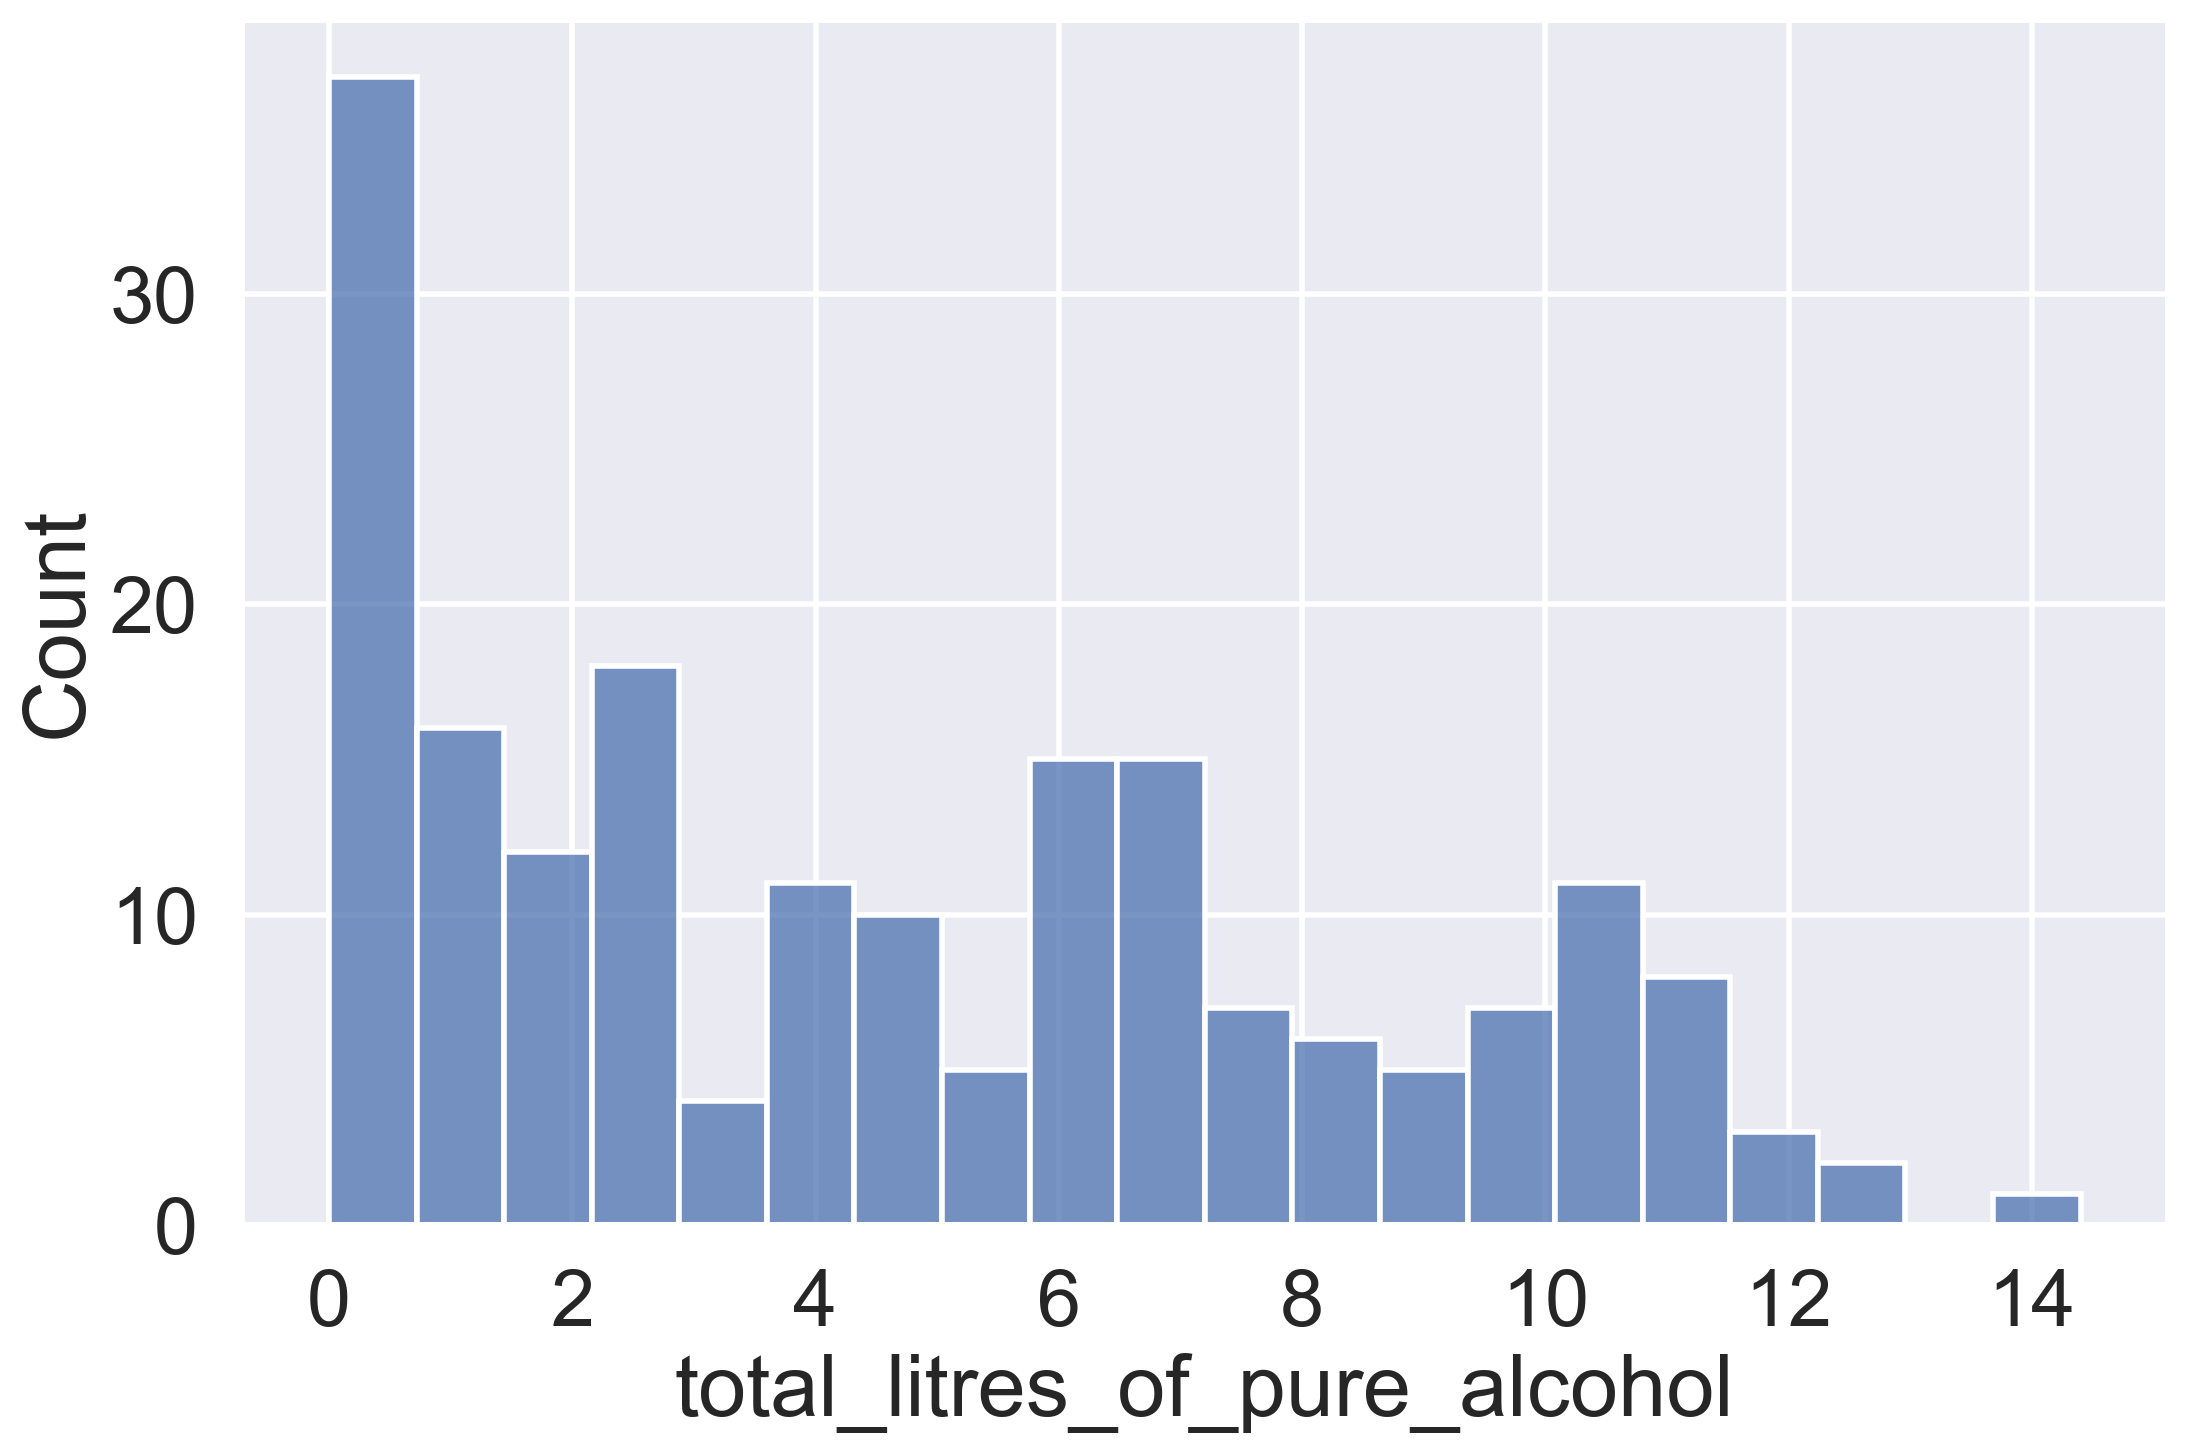

In [ ]:
plot_by_type(col='total_litres_of_pure_alcohol')